## 3층 신경망을 통한 Logical XOR 연산 구현

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(1238)

In [19]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def MSE(y, y_hat):
    return np.mean((y - y_hat) ** 2)

In [21]:
W1 = np.random.randn(2, 2)
b1 = np.random.randn(1, 2)
W2 = np.random.randn(2, 3)
b2 = np.random.randn(1, 3)
W3 = np.random.randn(3, 1)
b3 = np.random.randn(1, 1)

eta = 0.1
epochs = 10000

for _ in tqdm(range(epochs)):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    Y_hat = a3

    L = MSE(Y, Y_hat)

    dLde = Y - Y_hat
    deda3 = -1 * np.ones((4, 1))
    da3dz3 = a3 * (1 - a3)
    dz3dW3 = a2
    dz3db3 = np.ones((4, 1))
    delta3 = dLde * deda3 * da3dz3
    delta3 = -1 * delta3
    dLdW3 = np.dot(dz3dW3.T, delta3)
    dLdb3 = np.dot(dz3db3.T, delta3)

    da2dz2 = a2 * (1 - a2)
    delta2 = np.dot(delta3, W3.T) * da2dz2

    dz2dW2 = a1
    dz2db2 = np.ones((4, 1))
    dLdW2 = np.dot(dz2dW2.T, delta2)
    dLdb2 = np.dot(dz2db2.T, delta2)

    da1dz1 = a1 * (1 - a1)
    delta1 = np.dot(delta2, W2.T) * da1dz1
    dz1dW1 = X
    dz1db1 = np.ones((4, 1))
    dLdW1 = np.dot(dz1dW1.T, delta1)
    dLdb1 = np.dot(dz1db1.T, delta1)

    W3 = W3 + eta * dLdW3
    b3 = b3 + eta * dLdb3
    W2 = W2 + eta * dLdW2
    b2 = b2 + eta * dLdb2
    W1 = W1 + eta * dLdW1
    b1 = b1 + eta * dLdb1

print(f"Y_hat: \n{Y_hat}")
print(f"Loss : {L}")

100%|██████████| 10000/10000 [00:00<00:00, 10528.65it/s]

Y_hat: 
[[0.04105323]
 [0.95392237]
 [0.97411308]
 [0.03645392]]
Loss : 0.001451883974329091


In [22]:
print((Y_hat > 0.5).astype(int).T)

[[0 1 1 0]]


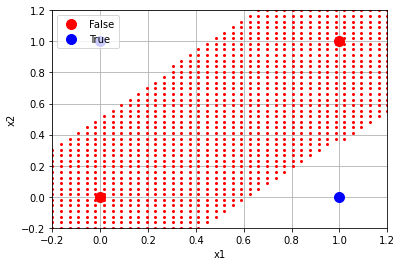

In [23]:
def forward(X, W1, b1, W2, b2, W3, b3):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, W3) + b3
    a3 = sigmoid(z3)
    Y_hat = a3
    return Y_hat

num_of_samples = 40
(m, n) = X.shape

x1_min = -0.2
x1_max = 1.2
x2_min = -0.2
x2_max = 1.2

x1 = np.linspace(x1_min, x1_max, num_of_samples)
x2 = np.linspace(x2_min, x2_max, num_of_samples)

X_new = np.ones((num_of_samples ** 2, n))
for i in range(num_of_samples):
    for j in range(num_of_samples):
        X_new[i * num_of_samples + j, 0] = x1[i]
        X_new[i * num_of_samples + j, 1] = x2[j]

Y_hat = forward(X_new, W1, b1, W2, b2, W3, b3)
Y_hat = np.reshape((Y_hat > 0.5).astype(int), (num_of_samples ** 2))
plt.plot(X_new[Y_hat == 0][:, 0], X_new[Y_hat == 0][:, 1], 'r.', markersize = 4)

plt.plot(X[0::3, 0], X[0::3, 1], 'r.', markersize=20, label = "False")
plt.plot(X[1:3, 0], X[1:3, 1], 'b.', markersize=20, label = "True")\

plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.show()